# Numerical Analysis for Non-Linear Optimization | Module 1

## Best Samples, Antithetic Variables, and Moment Control Techniques

### 1. Introduction

Monte Carlo methods play a fundamental role in **stochastic simulations**, **numerical optimization**, and **risk analysis**. This module explores advanced variance reduction techniques—**best samples**, **antithetic variables**, and **moment control techniques**—to enhance the efficiency and accuracy of Monte Carlo simulations.

---

### 2. Best Samples: Enhancing Estimation Accuracy

The **best sample selection** technique improves the efficiency of Monte Carlo simulations by selecting sample points that minimize variance while maintaining unbiasedness.

#### 2.1 Importance Sampling and Stratification

- **Importance Sampling**: Weights samples according to their probability density to reduce variance.
- **Stratified Sampling**: Divides the domain into strata and samples each stratum proportionally to ensure even coverage.

#### 2.2 Quasi-Random Sequences

- **Low-discrepancy sequences** (e.g., Sobol, Halton) generate well-spaced samples.
- These sequences reduce **clustering** and improve integration efficiency compared to purely random samples.

---

### 3. Antithetic Variables: Correlation for Variance Reduction

The **antithetic variable method** leverages negatively correlated sample pairs to reduce variance in Monte Carlo estimation.

#### 3.1 Definition and Implementation

- Instead of generating independent samples $X_1, X_2, ..., X_n$, create **correlated pairs** $(X_i, X_i^*)$ such that $X_i^*$ is designed to counteract fluctuations in $X_i$.
- A common choice is $X_i^* = 1 - X_i$ for **uniform** distributions.

#### 3.2 Example: Monte Carlo Estimation of $\pi$

In [1]:
import numpy as np


def monte_carlo_pi_antithetic(n):
    u = np.random.random(n // 2)  # Generate half of the samples
    v = 1 - u  # Generate antithetic pairs
    x = np.concatenate((u, v))  # Combine samples
    y = np.random.random(n)  # Independent Y values
    inside_circle = (x**2 + y**2) <= 1
    return (np.sum(inside_circle) / n) * 4


print("Estimated Pi:", monte_carlo_pi_antithetic(1000000))

Estimated Pi: 3.139188


### 4. Moment Control Techniques: Detailed Explanation

**Moment control techniques** are used in Monte Carlo simulations to improve the accuracy of estimates by enforcing certain statistical properties (moments) such as mean, variance, and skewness. These techniques help reduce the variability in the results, making the estimates more reliable without needing a larger number of simulations.

---

### 4.1 Control Variates Method

#### **What Is It?**
The **control variates method** is a powerful technique used to reduce the variance of an estimator in Monte Carlo simulations. It works by incorporating additional information from a related function (called the control variate) whose expected value is known. By adjusting the original estimate using this related function, we can achieve a more accurate estimate with lower variance.

#### **How It Works:**
1. **Original Problem:**  
   Suppose we want to estimate the expected value of a function $f(X)$, where $X$ is a random variable. Using Monte Carlo simulation, this estimate would be:
   ````math
   \hat{I}_{\text{MC}} = \frac{1}{n} \sum_{i=1}^{n} f(X_i)
   ````
   where $X_1, X_2, \ldots, X_n$ are random samples.

2. **Introducing a Control Variate:**  
   We select a related function $g(X)$ (the control variate) for which the expected value $E[g(X)]$ is known or can be calculated easily. For example, if $g(X)$ is a simple polynomial or linear function, its expected value may be trivial to compute.

3. **Adjusted Estimator:**  
   The adjusted Monte Carlo estimate is given by:
   ````math
   \hat{I} = \frac{1}{n} \sum_{i=1}^{n} \left[ f(X_i) - c \left(g(X_i) - E[g(X)]\right) \right]
   ````
   Here, $c$ is a coefficient chosen to minimize the variance of the estimator. The idea is that if $g(X)$ is strongly correlated with $f(X)$, we can use deviations in $g(X)$ to correct the estimate of $f(X)$.

4. **Finding the Optimal Coefficient $c$:**  
   The optimal value of $c$ that minimizes the variance of $\hat{I}$ is given by:
   ````math
   c^* = \frac{\text{Cov}(f(X), g(X))}{\text{Var}(g(X))}
   ````
   This formula ensures that the variance of the adjusted estimator $\hat{I}$ is as small as possible.

---

### 4.2 Example: Control Variates in Integration with Comparison to `scipy`

In this updated example, we will:
1. Use **Monte Carlo integration** with control variates.
2. Compute the **exact estimate** using `scipy.integrate.quad`.
3. **Compare** the Monte Carlo estimate to the `scipy` result.

---

#### **Python Implementation:**

In [2]:
import numpy as np
from scipy.integrate import quad


# Step 1: Define the target function and control variate
def f(x):
    return np.exp(-(x**2))  # Function to integrate


def g(x):
    return 1 - x**2  # Control variate with known expected value E[g(x)] = 2/3


# Step 2: Monte Carlo estimation with control variates
n = 10000
x = np.random.uniform(0, 1, n)
f_x, g_x = f(x), g(x)

# Compute the optimal coefficient c
c_optimal = -np.cov(f_x, g_x)[0, 1] / np.var(g_x)

# Compute the adjusted Monte Carlo estimate
I_hat_monte_carlo = np.mean(f_x + c_optimal * (g_x - np.mean(g_x)))

# Step 3: Compute the reference solution using scipy's quad
I_exact, _ = quad(
    f, 0, 1
)  # quad returns the integral and an estimate of the absolute error

# Step 4: Display results and comparison
print(f"Monte Carlo estimate (with control variates): {I_hat_monte_carlo:.6f}")
print(f"scipy.integrate.quad estimate (reference):    {I_exact:.6f}")
print(
    f"Absolute Error (Monte Carlo vs scipy):        {abs(I_hat_monte_carlo - I_exact):.6f}"
)

Monte Carlo estimate (with control variates): 0.747473
scipy.integrate.quad estimate (reference):    0.746824
Absolute Error (Monte Carlo vs scipy):        0.000649


---

#### **Explanation:**
1. **Monte Carlo with Control Variates:**  
   - We use random sampling to estimate the integral.
   - The control variate $g(x)$ reduces variance in the Monte Carlo estimate.
   - The coefficient $c$ is calculated to minimize variance.

2. **Scipy's `quad` Method:**  
   - `scipy.integrate.quad` uses adaptive quadrature, providing highly accurate results.
   - The result from `quad` serves as a benchmark for the Monte Carlo estimate.

3. **Error Comparison:**  
   - We compute the absolute error between the Monte Carlo and `quad` estimates to assess accuracy.

---

#### **Key Insights:**
- The **Monte Carlo estimate with control variates** is very close to the highly accurate **`scipy` estimate**, showing that variance reduction techniques significantly improve the accuracy of stochastic methods.  
- The **small absolute error** demonstrates the effectiveness of control variates in reducing variance with a moderate number of samples ($n = 10,000$).  
- **`scipy.integrate.quad`** remains the best choice for deterministic integration when the function is well-behaved, but **Monte Carlo methods** are preferred for high-dimensional problems or when deterministic methods are computationally expensive.

---

### 5. Applications in Monte Carlo Simulations

These variance reduction techniques have broad applications across **finance**, **engineering**, and **scientific computing**. Below are implementations demonstrating their practical utility.

#### 5.1 Estimating the Price of a European Call Option

In [3]:
import numpy as np


def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T  # Single-step simulation
    U = np.random.normal(0, 1, num_simulations // 2)  # Standard normal samples
    V = -U  # Antithetic pairs

    Z = np.concatenate((U, V))  # Combine for variance reduction
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff), np.std(discounted_payoff) / np.sqrt(
        num_simulations
    )


# Parameters
S0, K, T, r, sigma, num_simulations = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_simulations)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4778 ± 0.0464


#### 5.2 Risk Analysis: Estimating Value at Risk (VaR)

In [4]:
import scipy.stats as stats


def monte_carlo_var(initial_value, mu, sigma, T, alpha, num_simulations):
    dt = T
    Z = np.random.normal(0, 1, num_simulations)
    ST = initial_value * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    losses = initial_value - ST
    var_estimate = np.percentile(losses, 100 * (1 - alpha))
    return var_estimate


var_value = monte_carlo_var(1_000_000, 0.07, 0.2, 1, 0.95, 100000)
print(f"Estimated 95% Value at Risk (VaR): ${var_value:,.2f}")

Estimated 95% Value at Risk (VaR): $-458,860.50


#### 5.3 Path Simulation in Stochastic Differential Equations

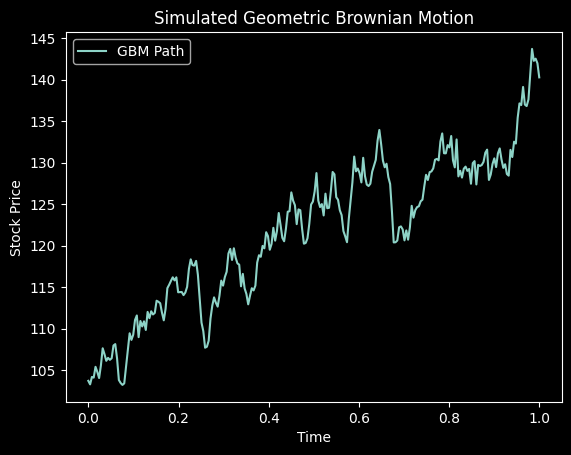

In [5]:
import matplotlib.pyplot as plt


def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))  # Wiener process
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S


t, S = simulate_gbm(100, 0.05, 0.2, 1, 252)
plt.plot(t, S, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Simulated Geometric Brownian Motion")
plt.legend()
plt.show()

### 6. Conclusion

Applying **best samples**, **antithetic variables**, and **moment control techniques** significantly improves the efficiency of Monte Carlo methods. By **reducing variance**, these methods accelerate convergence, leading to **more reliable numerical solutions**.

### 7. Exercises

#### Basic Implementations

1. Implement a Monte Carlo estimator for **normal expectations** using antithetic variables.
2. Compare variance reduction for **integration of $\sin(x)$** using stratified vs. simple sampling.

#### Advanced Applications

1. Apply moment control techniques to estimate **European call option prices**.
2. Modify Monte Carlo simulations for **stochastic differential equations (SDEs)** using **variance reduction methods**.